In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
df = pd.read_csv('sales_data_sample.csv', encoding='unicode_escape')

print(df.head())

   ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  \
0        10107               30      95.70                2  2871.00   
1        10121               34      81.35                5  2765.90   
2        10134               41      94.74                2  3884.34   
3        10145               45      83.26                6  3746.70   
4        10159               49     100.00               14  5205.27   

         ORDERDATE   STATUS  QTR_ID  MONTH_ID  YEAR_ID  ...  \
0   2/24/2003 0:00  Shipped       1         2     2003  ...   
1    5/7/2003 0:00  Shipped       2         5     2003  ...   
2    7/1/2003 0:00  Shipped       3         7     2003  ...   
3   8/25/2003 0:00  Shipped       3         8     2003  ...   
4  10/10/2003 0:00  Shipped       4        10     2003  ...   

                    ADDRESSLINE1  ADDRESSLINE2           CITY STATE  \
0        897 Long Airport Avenue           NaN            NYC    NY   
1             59 rue de l'Abbaye           NaN

In [6]:
df.columns

Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'ORDERDATE', 'STATUS', 'QTR_ID', 'MONTH_ID', 'YEAR_ID',
       'PRODUCTLINE', 'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE',
       'ADDRESSLINE1', 'ADDRESSLINE2', 'CITY', 'STATE', 'POSTALCODE',
       'COUNTRY', 'TERRITORY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME',
       'DEALSIZE'],
      dtype='object')

In [7]:
missing_data_count = df['STATE'].isna().sum()
print("Number of missing values in column:", missing_data_count)

Number of missing values in column: 1486


In [8]:
df["STATE"] = df['STATE'].fillna("INT")

In [9]:
df = df.drop(columns=['ADDRESSLINE2', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME'])

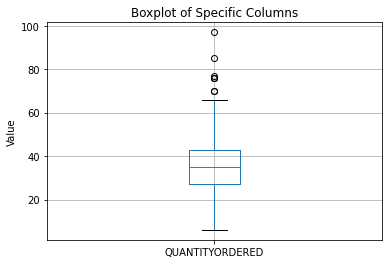

In [10]:
columns_to_plot = ['QUANTITYORDERED']
df[columns_to_plot].boxplot()
plt.title('Boxplot of Specific Columns')
plt.ylabel('Value')

plt.show()

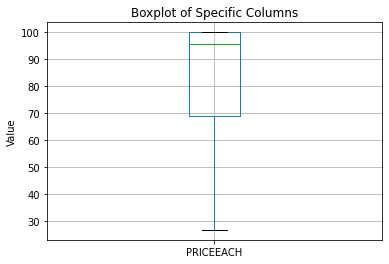

In [11]:
columns_to_plot = ['PRICEEACH']
df[columns_to_plot].boxplot()
plt.title('Boxplot of Specific Columns')
plt.ylabel('Value')

plt.show()

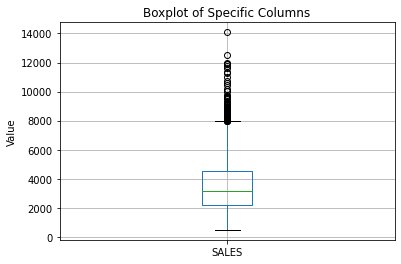

In [12]:
columns_to_plot = ['SALES']
df[columns_to_plot].boxplot()
plt.title('Boxplot of Specific Columns')
plt.ylabel('Value')

plt.show()

In [13]:
has_duplicates = df.duplicated().any()

if has_duplicates:
    print("There are duplicates in the DataFrame.")
else:
    print("There are no duplicates in the DataFrame.")

There are no duplicates in the DataFrame.


In [14]:
value_counts = df['YEAR_ID'].value_counts()

print("Count of discrete values in the column:")
print(value_counts)

Count of discrete values in the column:
2004    1345
2003    1000
2005     478
Name: YEAR_ID, dtype: int64


In [15]:
df['YEAR_ID'] = df['YEAR_ID'].astype(str)

<AxesSubplot:xlabel='YEAR_ID'>

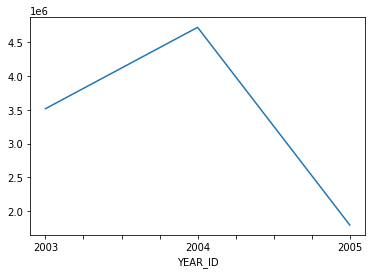

In [16]:
df.groupby('YEAR_ID')['SALES'].sum().plot()


<AxesSubplot:xlabel='YEAR_ID'>

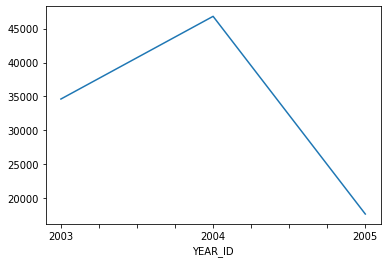

In [17]:
df.groupby('YEAR_ID')['QUANTITYORDERED'].sum().plot()

#sales plummetted after 2004 or there is not enough data to see what happened in 2005.

<AxesSubplot:xlabel='MONTH_ID'>

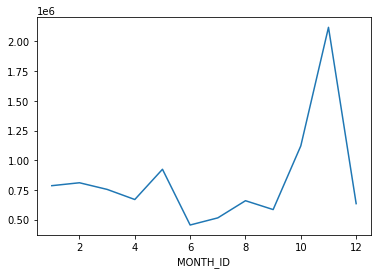

In [18]:
# The busiest sales is in right before the winter holidays.

df.groupby('MONTH_ID')['SALES'].sum().plot()


<AxesSubplot:xlabel='MONTH_ID'>

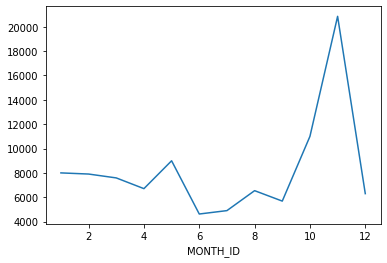

In [19]:
df.groupby('MONTH_ID')['QUANTITYORDERED'].sum().plot()


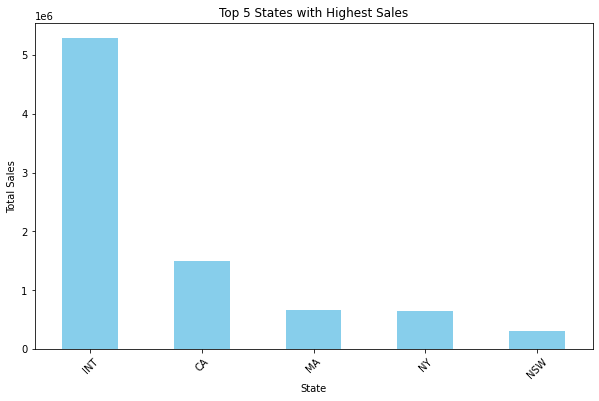

In [24]:
# Here we can see that the top sales amount is in CA, MA, and NY. Investing in
# more marketing in these areas can be more profittable. The international has a lot as well, but
# you would have have to split your resources into multiple countries which would be more expensive

state_sales = df.groupby('STATE')['SALES'].sum()
top_5_states = state_sales.nlargest(5)

# Plot the top 5 states with highest sales as a bar plot
top_5_states.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Top 5 States with Highest Sales')
plt.xlabel('State')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()